In [40]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
df = pd.read_csv("final_single_hand.csv", index_col = 0)

In [43]:
df.columns

Index(['WRIST_TO_THUMB_MCP', 'WRIST_TO_THUMB_IP', 'WRIST_TO_THUMB_TIP',
       'WRIST_TO_INDEX_FINGER_PIP', 'WRIST_TO_INDEX_FINGER_DIP',
       'WRIST_TO_INDEX_FINGER_TIP', 'WRIST_TO_MIDDLE_FINGER_PIP',
       'WRIST_TO_MIDDLE_FINGER_DIP', 'WRIST_TO_MIDDLE_FINGER_TIP',
       'WRIST_TO_RING_FINGER_PIP', 'WRIST_TO_RING_FINGER_DIP',
       'WRIST_TO_RING_FINGER_TIP', 'WRIST_TO_PINKY_PIP', 'WRIST_TO_PINKY_DIP',
       'WRIST_TO_PINKY_TIP', 'THUMB_MCP_TO_THUMB_TIP',
       'INDEX_FINGER_MCP_TO_INDEX_FINGER_TIP',
       'MIDDLE_FINGER_MCP_TO_MIDDLE_FINGER_TIP',
       'RING_FINGER_MCP_TO_RING_FINGER_TIP', 'PINKY_MCP_TO_PINKY_TIP',
       'THUMB_TIP_TO_INDEX_FINGER_MCP', 'THUMB_TIP_TO_INDEX_FINGER_PIP',
       'THUMB_TIP_TO_INDEX_FINGER_DIP', 'THUMB_TIP_TO_INDEX_FINGER_TIP',
       'THUMB_TIP_TO_MIDDLE_FINGER_MCP', 'THUMB_TIP_TO_MIDDLE_FINGER_PIP',
       'THUMB_TIP_TO_MIDDLE_FINGER_DIP', 'THUMB_TIP_TO_MIDDLE_FINGER_TIP',
       'THUMB_TIP_TO_RING_FINGER_MCP', 'THUMB_TIP_TO_RING_FINGER_PIP',

In [44]:
le = LabelEncoder()
le.fit(df['Sign'])
df['Sign'] = le.transform(df['Sign'])

In [45]:
set(df['Sign'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

Single hand model

In [46]:
from tensorflow.keras.utils import to_categorical

In [47]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['Sign'])
y = df['Sign']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
# X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.3, shuffle=True)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [48]:
# Set the random seed
tf.random.set_seed(42)


# Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(150, activation="relu", input_shape=(None,36)),
  tf.keras.layers.Dense(130, activation="relu"),
  tf.keras.layers.Dense(120, activation="relu"),
  tf.keras.layers.Dense(60, activation="relu"),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(15, activation="relu"),
  tf.keras.layers.Dense(16, activation="softmax")
])

# Compile the model with the ideal learning rate
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"]
              )

# fit the model
history = model.fit(X_train,y_train, epochs=1000, validation_data =(X_test,y_test))
# np.array(y_train).reshape((-1,42))

Epoch 1/1000
11/11 [==============================] - 1s 20ms/step - loss: 2.7642 - accuracy: 0.0951 - val_loss: 2.7487 - val_accuracy: 0.0940
Epoch 2/1000
11/11 [==============================] - 0s 4ms/step - loss: 2.7337 - accuracy: 0.1239 - val_loss: 2.7107 - val_accuracy: 0.0940
Epoch 3/1000
11/11 [==============================] - 0s 4ms/step - loss: 2.6816 - accuracy: 0.1326 - val_loss: 2.6364 - val_accuracy: 0.0940
Epoch 4/1000
11/11 [==============================] - 0s 4ms/step - loss: 2.5846 - accuracy: 0.1124 - val_loss: 2.5264 - val_accuracy: 0.0940
Epoch 5/1000
11/11 [==============================] - 0s 4ms/step - loss: 2.4697 - accuracy: 0.1182 - val_loss: 2.4109 - val_accuracy: 0.1074
Epoch 6/1000
11/11 [==============================] - 0s 4ms/step - loss: 2.3343 - accuracy: 0.1758 - val_loss: 2.2100 - val_accuracy: 0.2617
Epoch 7/1000
11/11 [==============================] - 0s 5ms/step - loss: 2.1641 - accuracy: 0.3141 - val_loss: 2.0414 - val_accuracy: 0.3087
Epoch

11/11 [==============================] - 0s 4ms/step - loss: 0.3265 - accuracy: 0.9049 - val_loss: 0.7466 - val_accuracy: 0.8523
Epoch 52/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.3268 - accuracy: 0.9164 - val_loss: 0.7553 - val_accuracy: 0.8255
Epoch 53/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.3234 - accuracy: 0.9078 - val_loss: 0.6360 - val_accuracy: 0.8792
Epoch 54/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.2895 - accuracy: 0.9164 - val_loss: 0.6856 - val_accuracy: 0.8591
Epoch 55/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.2791 - accuracy: 0.9337 - val_loss: 0.6737 - val_accuracy: 0.8993
Epoch 56/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.3069 - accuracy: 0.9020 - val_loss: 0.6512 - val_accuracy: 0.8725
Epoch 57/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.2836 - accuracy: 0.9135 - val_loss: 0.7150 - val_accuracy: 0.8255
Epoch 58/1000

11/11 [==============================] - 0s 4ms/step - loss: 0.1886 - accuracy: 0.9597 - val_loss: 0.6417 - val_accuracy: 0.8859
Epoch 109/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.1563 - accuracy: 0.9712 - val_loss: 0.6294 - val_accuracy: 0.9195
Epoch 110/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.1671 - accuracy: 0.9539 - val_loss: 0.7738 - val_accuracy: 0.8121
Epoch 111/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.2002 - accuracy: 0.9395 - val_loss: 0.8562 - val_accuracy: 0.8255
Epoch 112/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.2073 - accuracy: 0.9395 - val_loss: 0.5902 - val_accuracy: 0.9060
Epoch 113/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.1341 - accuracy: 0.9683 - val_loss: 0.6022 - val_accuracy: 0.9060
Epoch 114/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.1204 - accuracy: 0.9654 - val_loss: 0.5744 - val_accuracy: 0.9060
Epoch 1

Epoch 165/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0821 - accuracy: 0.9625 - val_loss: 0.5762 - val_accuracy: 0.9329
Epoch 166/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0752 - accuracy: 0.9741 - val_loss: 0.7412 - val_accuracy: 0.8792
Epoch 167/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0765 - accuracy: 0.9683 - val_loss: 0.6297 - val_accuracy: 0.9060
Epoch 168/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0819 - accuracy: 0.9683 - val_loss: 0.6807 - val_accuracy: 0.8859
Epoch 169/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.1212 - accuracy: 0.9539 - val_loss: 0.6698 - val_accuracy: 0.9060
Epoch 170/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0576 - accuracy: 0.9741 - val_loss: 0.5666 - val_accuracy: 0.9060
Epoch 171/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0659 - accuracy: 0.9798 - val_loss: 0.6346 - val_accuracy:

Epoch 222/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1433 - accuracy: 0.9568 - val_loss: 0.8498 - val_accuracy: 0.8322
Epoch 223/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1909 - accuracy: 0.9395 - val_loss: 0.8120 - val_accuracy: 0.8523
Epoch 224/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.1020 - accuracy: 0.9568 - val_loss: 0.6272 - val_accuracy: 0.9262
Epoch 225/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0496 - accuracy: 0.9827 - val_loss: 0.6132 - val_accuracy: 0.9195
Epoch 226/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.9798 - val_loss: 0.6374 - val_accuracy: 0.9195
Epoch 227/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9885 - val_loss: 0.6357 - val_accuracy: 0.9195
Epoch 228/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0377 - accuracy: 0.9856 - val_loss: 0.6206 - val_accuracy:

Epoch 279/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.9914 - val_loss: 0.6940 - val_accuracy: 0.9195
Epoch 280/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0204 - accuracy: 0.9942 - val_loss: 0.7063 - val_accuracy: 0.9128
Epoch 281/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 0.9914 - val_loss: 0.7595 - val_accuracy: 0.9195
Epoch 282/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9942 - val_loss: 0.7702 - val_accuracy: 0.8993
Epoch 283/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0205 - accuracy: 0.9914 - val_loss: 0.7415 - val_accuracy: 0.9262
Epoch 284/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0211 - accuracy: 0.9971 - val_loss: 0.8026 - val_accuracy: 0.8792
Epoch 285/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0639 - accuracy: 0.9769 - val_loss: 0.8168 - val_accuracy:

Epoch 336/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0481 - accuracy: 0.9827 - val_loss: 0.7688 - val_accuracy: 0.9195
Epoch 337/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0267 - accuracy: 0.9914 - val_loss: 0.7695 - val_accuracy: 0.9195
Epoch 338/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0195 - accuracy: 0.9971 - val_loss: 0.7604 - val_accuracy: 0.9195
Epoch 339/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0170 - accuracy: 0.9914 - val_loss: 0.7465 - val_accuracy: 0.9262
Epoch 340/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.9914 - val_loss: 0.7524 - val_accuracy: 0.9195
Epoch 341/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0430 - accuracy: 0.9827 - val_loss: 0.8293 - val_accuracy: 0.8859
Epoch 342/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.9914 - val_loss: 0.7953 - val_accuracy:

Epoch 393/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 0.9971 - val_loss: 0.7679 - val_accuracy: 0.9262
Epoch 394/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9942 - val_loss: 0.7841 - val_accuracy: 0.9262
Epoch 395/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0195 - accuracy: 0.9942 - val_loss: 0.7821 - val_accuracy: 0.9396
Epoch 396/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0105 - accuracy: 0.9971 - val_loss: 0.7932 - val_accuracy: 0.9329
Epoch 397/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0096 - accuracy: 0.9971 - val_loss: 0.7984 - val_accuracy: 0.9262
Epoch 398/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0099 - accuracy: 0.9942 - val_loss: 0.7998 - val_accuracy: 0.9396
Epoch 399/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.8026 - val_accuracy:

Epoch 450/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.8876 - val_accuracy: 0.9262
Epoch 451/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.8796 - val_accuracy: 0.9329
Epoch 452/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.8805 - val_accuracy: 0.9262
Epoch 453/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.8878 - val_accuracy: 0.9396
Epoch 454/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.8926 - val_accuracy: 0.9262
Epoch 455/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.8946 - val_accuracy: 0.9329
Epoch 456/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.8952 - val_accuracy:

Epoch 507/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9971 - val_loss: 0.8520 - val_accuracy: 0.9262
Epoch 508/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9971 - val_loss: 0.8405 - val_accuracy: 0.9396
Epoch 509/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.8627 - val_accuracy: 0.9262
Epoch 510/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.8672 - val_accuracy: 0.9262
Epoch 511/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.8640 - val_accuracy: 0.9396
Epoch 512/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.8649 - val_accuracy: 0.9262
Epoch 513/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.8675 - val_accuracy:

Epoch 564/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 1.0125 - val_accuracy: 0.9195
Epoch 565/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 1.0068 - val_accuracy: 0.9262
Epoch 566/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.0128 - val_accuracy: 0.9396
Epoch 567/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.0223 - val_accuracy: 0.9262
Epoch 568/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.0219 - val_accuracy: 0.9329
Epoch 569/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.0180 - val_accuracy: 0.9262
Epoch 570/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.0196 - val_accuracy:

Epoch 621/1000
11/11 [==============================] - 0s 3ms/step - loss: 9.2006e-04 - accuracy: 1.0000 - val_loss: 1.1255 - val_accuracy: 0.9195
Epoch 622/1000
11/11 [==============================] - 0s 3ms/step - loss: 7.5349e-04 - accuracy: 1.0000 - val_loss: 1.1231 - val_accuracy: 0.9396
Epoch 623/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.1201 - val_accuracy: 0.9396
Epoch 624/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.1288 - val_accuracy: 0.9262
Epoch 625/1000
11/11 [==============================] - 0s 3ms/step - loss: 8.2532e-04 - accuracy: 1.0000 - val_loss: 1.1292 - val_accuracy: 0.9329
Epoch 626/1000
11/11 [==============================] - 0s 3ms/step - loss: 8.4443e-04 - accuracy: 1.0000 - val_loss: 1.1298 - val_accuracy: 0.9329
Epoch 627/1000
11/11 [==============================] - 0s 3ms/step - loss: 9.6589e-04 - accuracy: 1.0000 - val_loss: 1.

11/11 [==============================] - 0s 3ms/step - loss: 4.5297e-04 - accuracy: 1.0000 - val_loss: 1.2071 - val_accuracy: 0.9329
Epoch 677/1000
11/11 [==============================] - 0s 3ms/step - loss: 5.3646e-04 - accuracy: 1.0000 - val_loss: 1.2048 - val_accuracy: 0.9329
Epoch 678/1000
11/11 [==============================] - 0s 3ms/step - loss: 7.1872e-04 - accuracy: 1.0000 - val_loss: 1.2104 - val_accuracy: 0.9329
Epoch 679/1000
11/11 [==============================] - 0s 3ms/step - loss: 7.4812e-04 - accuracy: 1.0000 - val_loss: 1.2242 - val_accuracy: 0.9128
Epoch 680/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.2058 - val_accuracy: 0.9262
Epoch 681/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.2407 - val_accuracy: 0.9262
Epoch 682/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.2413 - val_accuracy

Epoch 733/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.9225 - val_accuracy: 0.9262
Epoch 734/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.9247 - val_accuracy: 0.9195
Epoch 735/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.9262 - val_accuracy: 0.9262
Epoch 736/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.9338 - val_accuracy: 0.9195
Epoch 737/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.9414 - val_accuracy: 0.9262
Epoch 738/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.9425 - val_accuracy: 0.9128
Epoch 739/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.9427 - val_accuracy:

11/11 [==============================] - 0s 3ms/step - loss: 8.0577e-04 - accuracy: 1.0000 - val_loss: 1.0409 - val_accuracy: 0.9262
Epoch 790/1000
11/11 [==============================] - 0s 3ms/step - loss: 7.1889e-04 - accuracy: 1.0000 - val_loss: 1.0427 - val_accuracy: 0.9262
Epoch 791/1000
11/11 [==============================] - 0s 3ms/step - loss: 6.8366e-04 - accuracy: 1.0000 - val_loss: 1.0413 - val_accuracy: 0.9262
Epoch 792/1000
11/11 [==============================] - 0s 3ms/step - loss: 7.0500e-04 - accuracy: 1.0000 - val_loss: 1.0437 - val_accuracy: 0.9262
Epoch 793/1000
11/11 [==============================] - 0s 4ms/step - loss: 7.0336e-04 - accuracy: 1.0000 - val_loss: 1.0433 - val_accuracy: 0.9262
Epoch 794/1000
11/11 [==============================] - 0s 4ms/step - loss: 6.9397e-04 - accuracy: 1.0000 - val_loss: 1.0458 - val_accuracy: 0.9262
Epoch 795/1000
11/11 [==============================] - 0s 4ms/step - loss: 7.4099e-04 - accuracy: 1.0000 - val_loss: 1.0472 - 

11/11 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 0.9827 - val_loss: 0.5818 - val_accuracy: 0.9396
Epoch 845/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0337 - accuracy: 0.9827 - val_loss: 0.6307 - val_accuracy: 0.9396
Epoch 846/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.9914 - val_loss: 0.7269 - val_accuracy: 0.8658
Epoch 847/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9741 - val_loss: 0.6499 - val_accuracy: 0.9329
Epoch 848/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0414 - accuracy: 0.9942 - val_loss: 0.7962 - val_accuracy: 0.9262
Epoch 849/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9971 - val_loss: 0.6638 - val_accuracy: 0.9195
Epoch 850/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.6690 - val_accuracy: 0.9329
Epoch 8

Epoch 901/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0070 - accuracy: 0.9971 - val_loss: 0.8307 - val_accuracy: 0.9060
Epoch 902/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0193 - accuracy: 0.9942 - val_loss: 0.8144 - val_accuracy: 0.9329
Epoch 903/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0065 - accuracy: 0.9971 - val_loss: 0.8167 - val_accuracy: 0.9195
Epoch 904/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0474 - accuracy: 0.9885 - val_loss: 0.8564 - val_accuracy: 0.9128
Epoch 905/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0450 - accuracy: 0.9856 - val_loss: 0.9033 - val_accuracy: 0.8792
Epoch 906/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0399 - accuracy: 0.9827 - val_loss: 0.9206 - val_accuracy: 0.9060
Epoch 907/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0256 - accuracy: 0.9885 - val_loss: 0.7873 - val_accuracy:

11/11 [==============================] - 0s 3ms/step - loss: 6.8706e-04 - accuracy: 1.0000 - val_loss: 0.8819 - val_accuracy: 0.9262
Epoch 958/1000
11/11 [==============================] - 0s 4ms/step - loss: 6.8920e-04 - accuracy: 1.0000 - val_loss: 0.8847 - val_accuracy: 0.9262
Epoch 959/1000
11/11 [==============================] - 0s 5ms/step - loss: 6.6278e-04 - accuracy: 1.0000 - val_loss: 0.8861 - val_accuracy: 0.9262
Epoch 960/1000
11/11 [==============================] - 0s 5ms/step - loss: 6.6537e-04 - accuracy: 1.0000 - val_loss: 0.8883 - val_accuracy: 0.9262
Epoch 961/1000
11/11 [==============================] - 0s 6ms/step - loss: 6.6428e-04 - accuracy: 1.0000 - val_loss: 0.8900 - val_accuracy: 0.9262
Epoch 962/1000
11/11 [==============================] - 0s 4ms/step - loss: 6.3318e-04 - accuracy: 1.0000 - val_loss: 0.8918 - val_accuracy: 0.9262
Epoch 963/1000
11/11 [==============================] - 0s 4ms/step - loss: 6.4668e-04 - accuracy: 1.0000 - val_loss: 0.8938 - 

In [49]:
import matplotlib.pyplot as plt
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

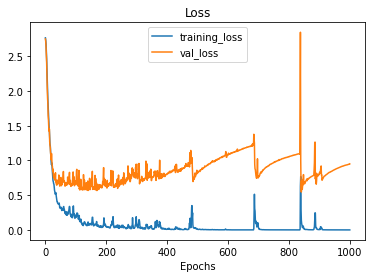

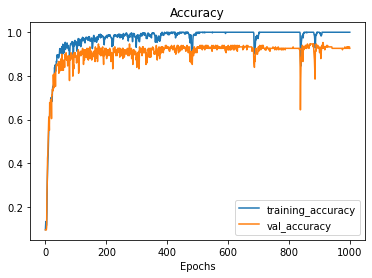

In [50]:
plot_loss_curves(history)

In [52]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)

In [53]:
d = ['0','1','2','3','4','5','6','7','8','9','C','I','L','O','U','V']
ans_pred = []
for i in y_pred:
    ans_pred.append(d[i.argmax()])
y_test_ans = []
for i in y_test:
    y_test_ans.append(d[i.argmax()])

In [54]:
df = pd.DataFrame(confusion_matrix(y_test_ans,ans_pred))

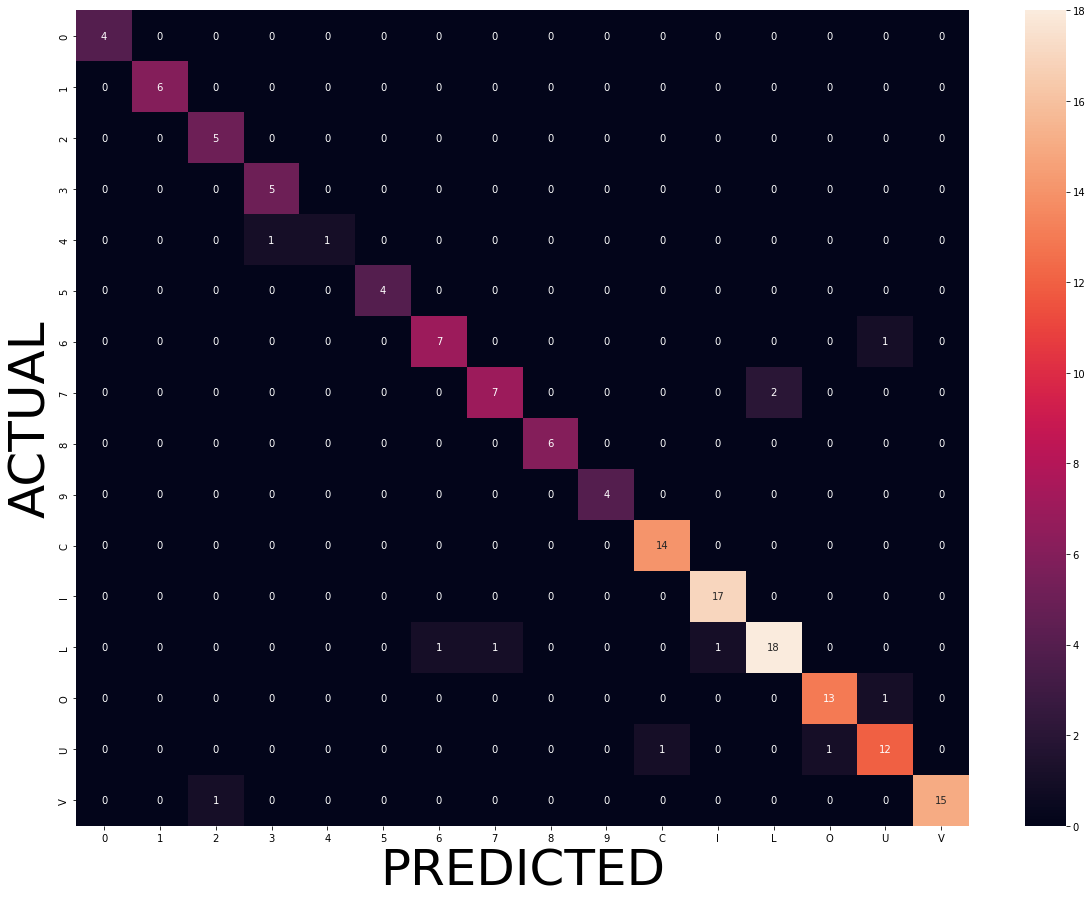

In [55]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

plt.subplots(figsize=(20,15))
df = pd.DataFrame(confusion_matrix(y_test_ans,ans_pred))


s=sn.heatmap(df,annot = True,xticklabels=d, yticklabels=d)
s.set_xlabel('PREDICTED', fontsize=50)
s.set_ylabel('ACTUAL', fontsize=50)
plt.show()

In [50]:
model.save("final_single_hand1.h5")

Space model

In [25]:
# space_df['Sign'] = "space"

In [17]:
# len(space_df)

40

In [56]:
import pandas as pd
import numpy as np

In [57]:
space_df = pd.read_csv('space.csv',index_col = 0)

In [58]:
space_df['Sign'] = "space"

In [59]:
dfq = pd.read_csv('final_single_hand.csv', index_col = 0)

In [60]:
len(dfq)

496

In [61]:
import random

In [62]:
g = []
for i in range(50):
    g.append(random.randint(0,496))

In [63]:
g= list(set(g))

In [64]:
space_df = space_df.append(dfq.iloc[g,:])

In [65]:
space_df['Sign'] = [1 if(i=="space") else 0 for i in space_df['Sign'] ]

In [67]:
space_df

,WRIST_TO_THUMB_MCP,WRIST_TO_THUMB_IP,WRIST_TO_THUMB_TIP,WRIST_TO_INDEX_FINGER_PIP,WRIST_TO_INDEX_FINGER_DIP,WRIST_TO_INDEX_FINGER_TIP,WRIST_TO_MIDDLE_FINGER_PIP,WRIST_TO_MIDDLE_FINGER_DIP,WRIST_TO_MIDDLE_FINGER_TIP,WRIST_TO_RING_FINGER_PIP,...,THUMB_TIP_TO_MIDDLE_FINGER_TIP,THUMB_TIP_TO_RING_FINGER_MCP,THUMB_TIP_TO_RING_FINGER_PIP,THUMB_TIP_TO_RING_FINGER_DIP,THUMB_TIP_TO_RING_FINGER_TIP,THUMB_TIP_TO_PINKY_MCP,THUMB_TIP_TO_PINKY_PIP,THUMB_TIP_TO_PINKY_DIP,THUMB_TIP_TO_PINKY_TIP,Sign
0,0.113691,0.160328,0.187440,0.200919,0.166035,0.141174,0.195150,0.143333,0.119844,0.185184,...,0.067925,0.067244,0.035521,0.063332,0.090351,0.094378,0.060527,0.080528,0.102627,1
1,0.123240,0.167617,0.183529,0.212962,0.196998,0.172048,0.204574,0.157205,0.134615,0.184626,...,0.055258,0.051506,0.017480,0.054854,0.076315,0.074596,0.050520,0.075216,0.091748,1
2,0.146595,0.205462,0.223700,0.236913,0.188082,0.167177,0.229976,0.164096,0.148441,0.208680,...,0.077044,0.092759,0.043580,0.085197,0.104555,0.122935,0.079438,0.106825,0.124445,1
3,0.149274,0.206784,0.253448,0.263723,0.209346,0.174526,0.243654,0.176516,0.152930,0.215622,...,0.102323,0.107958,0.077065,0.114962,0.134661,0.145817,0.117251,0.139638,0.155049,1
4,0.108926,0.151243,0.181088,0.203265,0.165259,0.135176,0.188945,0.138058,0.112801,0.164085,...,0.072648,0.082613,0.066389,0.085638,0.102273,0.114854,0.096345,0.106994,0.118020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.168377,0.216483,0.250413,0.285864,0.333381,0.374539,0.259714,0.309969,0.355857,0.204103,...,0.118486,0.108068,0.065096,0.111714,0.143306,0.139416,0.104956,0.136386,0.159454,0
245,0.174522,0.237926,0.278283,0.343301,0.410338,0.471685,0.314354,0.371828,0.422961,0.270761,...,0.149817,0.131647,0.053289,0.066952,0.092456,0.143453,0.089455,0.105122,0.124628,0
374,0.158983,0.234012,0.283098,0.250043,0.189234,0.160002,0.240945,0.167919,0.154823,0.224860,...,0.150476,0.176771,0.171209,0.180309,0.182023,0.207228,0.201622,0.206213,0.209500,0
252,0.155659,0.211228,0.242416,0.310816,0.369896,0.423586,0.289211,0.340391,0.383963,0.239575,...,0.144239,0.127712,0.039824,0.048706,0.079056,0.126270,0.062726,0.080685,0.104175,0


In [39]:
space_df.to_csv("final_space.csv")

In [68]:
from sklearn.model_selection import train_test_split
X = space_df.drop(columns = ['Sign'])
y = space_df['Sign']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [69]:
# Set the random seed
tf.random.set_seed(42)



# Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(150, activation="relu", input_shape=(None,36)),
  tf.keras.layers.Dense(130, activation="relu"),
  tf.keras.layers.Dense(120, activation="relu"),
  tf.keras.layers.Dense(60, activation="relu"),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(15, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"]
              )

# fit the model
history = model.fit(X_train,y_train, epochs=1000, validation_data =(X_test,y_test))
# np.array(y_train).reshape((-1,42))

Epoch 1/1000
2/2 [==============================] - 1s 160ms/step - loss: 0.6927 - accuracy: 0.4590 - val_loss: 0.6862 - val_accuracy: 0.5185
Epoch 2/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.6813 - accuracy: 0.5574 - val_loss: 0.6778 - val_accuracy: 0.5185
Epoch 3/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6724 - accuracy: 0.5574 - val_loss: 0.6689 - val_accuracy: 0.5185
Epoch 4/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6609 - accuracy: 0.5902 - val_loss: 0.6586 - val_accuracy: 0.5926
Epoch 5/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.6482 - accuracy: 0.6230 - val_loss: 0.6448 - val_accuracy: 0.5185
Epoch 6/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6326 - accuracy: 0.5902 - val_loss: 0.6272 - val_accuracy: 0.6296
Epoch 7/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6110 - accuracy: 0.7213 - val_loss: 0.6046 - val_accuracy: 0.8519
Epoch 8/1000

2/2 [==============================] - 0s 21ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 52/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 53/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 54/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 55/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 56/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 57/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 58/1000
2/2 [=

Epoch 108/1000
2/2 [==============================] - 0s 20ms/step - loss: 5.1345e-04 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 109/1000
2/2 [==============================] - 0s 20ms/step - loss: 5.0284e-04 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 110/1000
2/2 [==============================] - 0s 19ms/step - loss: 4.9443e-04 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 111/1000
2/2 [==============================] - 0s 21ms/step - loss: 4.8518e-04 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 112/1000
2/2 [==============================] - 0s 21ms/step - loss: 4.7356e-04 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 113/1000
2/2 [==============================] - 0s 20ms/step - loss: 4.6385e-04 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 114/1000
2/2 [==============================] - 0s 19ms/step - loss: 4.5550e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 164/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.3470e-04 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 165/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.3268e-04 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 166/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.2941e-04 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 167/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.2691e-04 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 168/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.2391e-04 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 169/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.2164e-04 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 170/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.1850e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 220/1000
2/2 [==============================] - 0s 20ms/step - loss: 4.9521e-05 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 221/1000
2/2 [==============================] - 0s 21ms/step - loss: 4.8723e-05 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 222/1000
2/2 [==============================] - 0s 20ms/step - loss: 4.7835e-05 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 223/1000
2/2 [==============================] - 0s 20ms/step - loss: 4.7306e-05 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 224/1000
2/2 [==============================] - 0s 20ms/step - loss: 4.6699e-05 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 225/1000
2/2 [==============================] - 0s 19ms/step - loss: 4.5873e-05 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 226/1000
2/2 [==============================] - 0s 21ms/step - loss: 4.5348e-05 - accuracy: 1.0000 - val_loss: 0

Epoch 276/1000
2/2 [==============================] - 0s 21ms/step - loss: 2.4847e-05 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 277/1000
2/2 [==============================] - 0s 21ms/step - loss: 2.4611e-05 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 278/1000
2/2 [==============================] - 0s 21ms/step - loss: 2.4347e-05 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 279/1000
2/2 [==============================] - 0s 20ms/step - loss: 2.4109e-05 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 280/1000
2/2 [==============================] - 0s 21ms/step - loss: 2.3888e-05 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 281/1000
2/2 [==============================] - 0s 21ms/step - loss: 2.3585e-05 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 282/1000
2/2 [==============================] - 0s 21ms/step - loss: 2.3375e-05 - accuracy: 1.0000 - val_loss: 0

2/2 [==============================] - 0s 20ms/step - loss: 1.4938e-05 - accuracy: 1.0000 - val_loss: 9.7113e-04 - val_accuracy: 1.0000
Epoch 332/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.4804e-05 - accuracy: 1.0000 - val_loss: 9.6880e-04 - val_accuracy: 1.0000
Epoch 333/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.4726e-05 - accuracy: 1.0000 - val_loss: 9.6616e-04 - val_accuracy: 1.0000
Epoch 334/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.4574e-05 - accuracy: 1.0000 - val_loss: 9.6353e-04 - val_accuracy: 1.0000
Epoch 335/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.4483e-05 - accuracy: 1.0000 - val_loss: 9.6239e-04 - val_accuracy: 1.0000
Epoch 336/1000
2/2 [==============================] - 0s 25ms/step - loss: 1.4347e-05 - accuracy: 1.0000 - val_loss: 9.6176e-04 - val_accuracy: 1.0000
Epoch 337/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.4252e-05 - accuracy: 1.0000 - va

2/2 [==============================] - 0s 25ms/step - loss: 1.0008e-05 - accuracy: 1.0000 - val_loss: 8.4228e-04 - val_accuracy: 1.0000
Epoch 386/1000
2/2 [==============================] - 0s 21ms/step - loss: 9.9305e-06 - accuracy: 1.0000 - val_loss: 8.3980e-04 - val_accuracy: 1.0000
Epoch 387/1000
2/2 [==============================] - 0s 21ms/step - loss: 9.8767e-06 - accuracy: 1.0000 - val_loss: 8.3869e-04 - val_accuracy: 1.0000
Epoch 388/1000
2/2 [==============================] - 0s 24ms/step - loss: 9.8029e-06 - accuracy: 1.0000 - val_loss: 8.3609e-04 - val_accuracy: 1.0000
Epoch 389/1000
2/2 [==============================] - 0s 22ms/step - loss: 9.7276e-06 - accuracy: 1.0000 - val_loss: 8.3567e-04 - val_accuracy: 1.0000
Epoch 390/1000
2/2 [==============================] - 0s 22ms/step - loss: 9.6643e-06 - accuracy: 1.0000 - val_loss: 8.3437e-04 - val_accuracy: 1.0000
Epoch 391/1000
2/2 [==============================] - 0s 22ms/step - loss: 9.6057e-06 - accuracy: 1.0000 - va

2/2 [==============================] - 0s 20ms/step - loss: 7.1292e-06 - accuracy: 1.0000 - val_loss: 7.5685e-04 - val_accuracy: 1.0000
Epoch 440/1000
2/2 [==============================] - 0s 20ms/step - loss: 7.0825e-06 - accuracy: 1.0000 - val_loss: 7.5506e-04 - val_accuracy: 1.0000
Epoch 441/1000
2/2 [==============================] - 0s 20ms/step - loss: 7.0398e-06 - accuracy: 1.0000 - val_loss: 7.5473e-04 - val_accuracy: 1.0000
Epoch 442/1000
2/2 [==============================] - 0s 22ms/step - loss: 6.9955e-06 - accuracy: 1.0000 - val_loss: 7.5302e-04 - val_accuracy: 1.0000
Epoch 443/1000
2/2 [==============================] - 0s 20ms/step - loss: 6.9600e-06 - accuracy: 1.0000 - val_loss: 7.5139e-04 - val_accuracy: 1.0000
Epoch 444/1000
2/2 [==============================] - 0s 20ms/step - loss: 6.9232e-06 - accuracy: 1.0000 - val_loss: 7.5074e-04 - val_accuracy: 1.0000
Epoch 445/1000
2/2 [==============================] - 0s 19ms/step - loss: 6.8900e-06 - accuracy: 1.0000 - va

2/2 [==============================] - 0s 20ms/step - loss: 5.3131e-06 - accuracy: 1.0000 - val_loss: 6.9021e-04 - val_accuracy: 1.0000
Epoch 494/1000
2/2 [==============================] - 0s 21ms/step - loss: 5.2949e-06 - accuracy: 1.0000 - val_loss: 6.8797e-04 - val_accuracy: 1.0000
Epoch 495/1000
2/2 [==============================] - 0s 21ms/step - loss: 5.2643e-06 - accuracy: 1.0000 - val_loss: 6.8640e-04 - val_accuracy: 1.0000
Epoch 496/1000
2/2 [==============================] - 0s 20ms/step - loss: 5.2325e-06 - accuracy: 1.0000 - val_loss: 6.8516e-04 - val_accuracy: 1.0000
Epoch 497/1000
2/2 [==============================] - 0s 19ms/step - loss: 5.2113e-06 - accuracy: 1.0000 - val_loss: 6.8419e-04 - val_accuracy: 1.0000
Epoch 498/1000
2/2 [==============================] - 0s 21ms/step - loss: 5.1875e-06 - accuracy: 1.0000 - val_loss: 6.8255e-04 - val_accuracy: 1.0000
Epoch 499/1000
2/2 [==============================] - 0s 20ms/step - loss: 5.1519e-06 - accuracy: 1.0000 - va

2/2 [==============================] - 0s 20ms/step - loss: 4.1044e-06 - accuracy: 1.0000 - val_loss: 6.3177e-04 - val_accuracy: 1.0000
Epoch 548/1000
2/2 [==============================] - 0s 20ms/step - loss: 4.0908e-06 - accuracy: 1.0000 - val_loss: 6.3026e-04 - val_accuracy: 1.0000
Epoch 549/1000
2/2 [==============================] - 0s 20ms/step - loss: 4.0735e-06 - accuracy: 1.0000 - val_loss: 6.2978e-04 - val_accuracy: 1.0000
Epoch 550/1000
2/2 [==============================] - 0s 20ms/step - loss: 4.0552e-06 - accuracy: 1.0000 - val_loss: 6.2909e-04 - val_accuracy: 1.0000
Epoch 551/1000
2/2 [==============================] - 0s 19ms/step - loss: 4.0353e-06 - accuracy: 1.0000 - val_loss: 6.2780e-04 - val_accuracy: 1.0000
Epoch 552/1000
2/2 [==============================] - 0s 21ms/step - loss: 4.0213e-06 - accuracy: 1.0000 - val_loss: 6.2813e-04 - val_accuracy: 1.0000
Epoch 553/1000
2/2 [==============================] - 0s 21ms/step - loss: 3.9974e-06 - accuracy: 1.0000 - va

2/2 [==============================] - 0s 20ms/step - loss: 3.2536e-06 - accuracy: 1.0000 - val_loss: 5.8750e-04 - val_accuracy: 1.0000
Epoch 602/1000
2/2 [==============================] - 0s 20ms/step - loss: 3.2415e-06 - accuracy: 1.0000 - val_loss: 5.8717e-04 - val_accuracy: 1.0000
Epoch 603/1000
2/2 [==============================] - 0s 21ms/step - loss: 3.2287e-06 - accuracy: 1.0000 - val_loss: 5.8599e-04 - val_accuracy: 1.0000
Epoch 604/1000
2/2 [==============================] - 0s 20ms/step - loss: 3.2148e-06 - accuracy: 1.0000 - val_loss: 5.8453e-04 - val_accuracy: 1.0000
Epoch 605/1000
2/2 [==============================] - 0s 22ms/step - loss: 3.2015e-06 - accuracy: 1.0000 - val_loss: 5.8328e-04 - val_accuracy: 1.0000
Epoch 606/1000
2/2 [==============================] - 0s 22ms/step - loss: 3.1899e-06 - accuracy: 1.0000 - val_loss: 5.8290e-04 - val_accuracy: 1.0000
Epoch 607/1000
2/2 [==============================] - 0s 25ms/step - loss: 3.1755e-06 - accuracy: 1.0000 - va

2/2 [==============================] - 0s 19ms/step - loss: 2.6343e-06 - accuracy: 1.0000 - val_loss: 5.4688e-04 - val_accuracy: 1.0000
Epoch 656/1000
2/2 [==============================] - 0s 19ms/step - loss: 2.6243e-06 - accuracy: 1.0000 - val_loss: 5.4655e-04 - val_accuracy: 1.0000
Epoch 657/1000
2/2 [==============================] - 0s 21ms/step - loss: 2.6128e-06 - accuracy: 1.0000 - val_loss: 5.4606e-04 - val_accuracy: 1.0000
Epoch 658/1000
2/2 [==============================] - 0s 20ms/step - loss: 2.6034e-06 - accuracy: 1.0000 - val_loss: 5.4511e-04 - val_accuracy: 1.0000
Epoch 659/1000
2/2 [==============================] - 0s 20ms/step - loss: 2.5958e-06 - accuracy: 1.0000 - val_loss: 5.4513e-04 - val_accuracy: 1.0000
Epoch 660/1000
2/2 [==============================] - 0s 19ms/step - loss: 2.5860e-06 - accuracy: 1.0000 - val_loss: 5.4430e-04 - val_accuracy: 1.0000
Epoch 661/1000
2/2 [==============================] - 0s 19ms/step - loss: 2.5745e-06 - accuracy: 1.0000 - va

2/2 [==============================] - 0s 20ms/step - loss: 2.1693e-06 - accuracy: 1.0000 - val_loss: 5.1422e-04 - val_accuracy: 1.0000
Epoch 710/1000
2/2 [==============================] - 0s 19ms/step - loss: 2.1602e-06 - accuracy: 1.0000 - val_loss: 5.1359e-04 - val_accuracy: 1.0000
Epoch 711/1000
2/2 [==============================] - 0s 21ms/step - loss: 2.1538e-06 - accuracy: 1.0000 - val_loss: 5.1246e-04 - val_accuracy: 1.0000
Epoch 712/1000
2/2 [==============================] - 0s 22ms/step - loss: 2.1462e-06 - accuracy: 1.0000 - val_loss: 5.1190e-04 - val_accuracy: 1.0000
Epoch 713/1000
2/2 [==============================] - 0s 20ms/step - loss: 2.1393e-06 - accuracy: 1.0000 - val_loss: 5.1192e-04 - val_accuracy: 1.0000
Epoch 714/1000
2/2 [==============================] - 0s 20ms/step - loss: 2.1305e-06 - accuracy: 1.0000 - val_loss: 5.1103e-04 - val_accuracy: 1.0000
Epoch 715/1000
2/2 [==============================] - 0s 21ms/step - loss: 2.1222e-06 - accuracy: 1.0000 - va

2/2 [==============================] - 0s 23ms/step - loss: 1.8090e-06 - accuracy: 1.0000 - val_loss: 4.8514e-04 - val_accuracy: 1.0000
Epoch 764/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.8028e-06 - accuracy: 1.0000 - val_loss: 4.8501e-04 - val_accuracy: 1.0000
Epoch 765/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.7965e-06 - accuracy: 1.0000 - val_loss: 4.8431e-04 - val_accuracy: 1.0000
Epoch 766/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.7908e-06 - accuracy: 1.0000 - val_loss: 4.8381e-04 - val_accuracy: 1.0000
Epoch 767/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.7857e-06 - accuracy: 1.0000 - val_loss: 4.8351e-04 - val_accuracy: 1.0000
Epoch 768/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.7804e-06 - accuracy: 1.0000 - val_loss: 4.8336e-04 - val_accuracy: 1.0000
Epoch 769/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.7736e-06 - accuracy: 1.0000 - va

2/2 [==============================] - 0s 24ms/step - loss: 1.5281e-06 - accuracy: 1.0000 - val_loss: 4.5967e-04 - val_accuracy: 1.0000
Epoch 818/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.5237e-06 - accuracy: 1.0000 - val_loss: 4.5942e-04 - val_accuracy: 1.0000
Epoch 819/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.5181e-06 - accuracy: 1.0000 - val_loss: 4.5891e-04 - val_accuracy: 1.0000
Epoch 820/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.5143e-06 - accuracy: 1.0000 - val_loss: 4.5904e-04 - val_accuracy: 1.0000
Epoch 821/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.5090e-06 - accuracy: 1.0000 - val_loss: 4.5845e-04 - val_accuracy: 1.0000
Epoch 822/1000
2/2 [==============================] - 0s 25ms/step - loss: 1.5038e-06 - accuracy: 1.0000 - val_loss: 4.5806e-04 - val_accuracy: 1.0000
Epoch 823/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.5002e-06 - accuracy: 1.0000 - va

2/2 [==============================] - 0s 21ms/step - loss: 1.3037e-06 - accuracy: 1.0000 - val_loss: 4.3879e-04 - val_accuracy: 1.0000
Epoch 872/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.3000e-06 - accuracy: 1.0000 - val_loss: 4.3799e-04 - val_accuracy: 1.0000
Epoch 873/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.2960e-06 - accuracy: 1.0000 - val_loss: 4.3743e-04 - val_accuracy: 1.0000
Epoch 874/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.2914e-06 - accuracy: 1.0000 - val_loss: 4.3712e-04 - val_accuracy: 1.0000
Epoch 875/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.2888e-06 - accuracy: 1.0000 - val_loss: 4.3688e-04 - val_accuracy: 1.0000
Epoch 876/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.2843e-06 - accuracy: 1.0000 - val_loss: 4.3664e-04 - val_accuracy: 1.0000
Epoch 877/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.2815e-06 - accuracy: 1.0000 - va

2/2 [==============================] - 0s 22ms/step - loss: 1.1218e-06 - accuracy: 1.0000 - val_loss: 4.1986e-04 - val_accuracy: 1.0000
Epoch 926/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.1191e-06 - accuracy: 1.0000 - val_loss: 4.1957e-04 - val_accuracy: 1.0000
Epoch 927/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.1156e-06 - accuracy: 1.0000 - val_loss: 4.1912e-04 - val_accuracy: 1.0000
Epoch 928/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.1121e-06 - accuracy: 1.0000 - val_loss: 4.1897e-04 - val_accuracy: 1.0000
Epoch 929/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.1094e-06 - accuracy: 1.0000 - val_loss: 4.1893e-04 - val_accuracy: 1.0000
Epoch 930/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.1060e-06 - accuracy: 1.0000 - val_loss: 4.1850e-04 - val_accuracy: 1.0000
Epoch 931/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.1032e-06 - accuracy: 1.0000 - va

2/2 [==============================] - 0s 20ms/step - loss: 9.7228e-07 - accuracy: 1.0000 - val_loss: 4.0272e-04 - val_accuracy: 1.0000
Epoch 980/1000
2/2 [==============================] - 0s 21ms/step - loss: 9.6987e-07 - accuracy: 1.0000 - val_loss: 4.0230e-04 - val_accuracy: 1.0000
Epoch 981/1000
2/2 [==============================] - 0s 20ms/step - loss: 9.6737e-07 - accuracy: 1.0000 - val_loss: 4.0220e-04 - val_accuracy: 1.0000
Epoch 982/1000
2/2 [==============================] - 0s 23ms/step - loss: 9.6468e-07 - accuracy: 1.0000 - val_loss: 4.0199e-04 - val_accuracy: 1.0000
Epoch 983/1000
2/2 [==============================] - 0s 21ms/step - loss: 9.6220e-07 - accuracy: 1.0000 - val_loss: 4.0153e-04 - val_accuracy: 1.0000
Epoch 984/1000
2/2 [==============================] - 0s 22ms/step - loss: 9.6017e-07 - accuracy: 1.0000 - val_loss: 4.0140e-04 - val_accuracy: 1.0000
Epoch 985/1000
2/2 [==============================] - 0s 25ms/step - loss: 9.5751e-07 - accuracy: 1.0000 - va

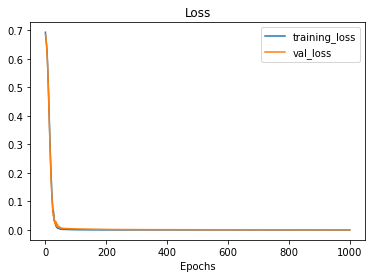

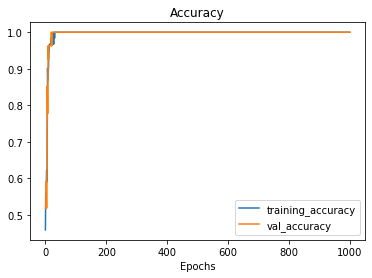

In [70]:
plot_loss_curves(history)

In [71]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)

In [74]:
y_pred = [1 if i//0.5>0 else 0 for i in y_pred] 

In [77]:
confusion_matrix(y_pred,y_test)

array([[14,  0],
       [ 0, 13]])

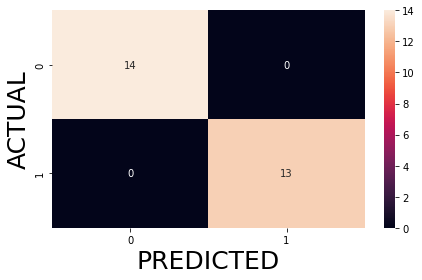

In [83]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

plt.subplots(figsize=(7,4))
df = pd.DataFrame(confusion_matrix(y_test,y_pred))


s=sn.heatmap(df,annot = True)
s.set_xlabel('PREDICTED', fontsize=25)
s.set_ylabel('ACTUAL', fontsize=25)
plt.show()

In [45]:
model.save("space.h5")